## 1. 필요한 패키지 로드

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

import glob

from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
import random

## 2. 파일 불러오기

In [2]:
path = 'C:/Users/user/Desktop/16017005/Leisure'

In [3]:
import os
os.listdir(path)

['.ipynb_checkpoints',
 '1229.ipynb',
 'catboost_info',
 'final_rf.pkl',
 'full.csv',
 'Leisure_EDA-Copy1.ipynb',
 'Leisure_EDA-Copy2.ipynb',
 'Leisure_EDA-Copy3.ipynb',
 'Leisure_EDA.ipynb',
 'Leisure_Modeling-Copy1.ipynb',
 'Leisure_Modeling-Copy2.ipynb',
 'Leisure_Modeling-Copy3.ipynb',
 'Leisure_Modeling-Copy4.ipynb',
 'Leisure_Modeling.ipynb',
 'logs.log',
 'nlas2020_newdata2.csv',
 'nlas2020_newdata_cat.csv',
 'nlas2020_newdata_py.csv',
 'nlas2020_revised.csv',
 'tuned_cat.pkl',
 'unseen.csv']

In [4]:
data = pd.read_csv(path+'/nlas2020_newdata_cat.csv',engine='python', index_col = 0)

In [5]:
pd.set_option('display.max_columns', 100)
data

,문화예술,스포츠,관광,취미오락,휴식,사회기타,여가비용_B,여가비용_C,여가비용_D,평일여가시간_B,평일여가시간_C,평일여가시간_D,평일여가시간_E,휴일여가시간_B,휴일여가시간_C,휴일여가시간_D,휴일여가시간_E,평일여가충분도,휴일여가충분도,공공여가시설충분도,민간여가산업만족도,일과여가의균형_B,일과여가의균형_C,여가인식:삶의필수요건,여가인식:삶의영향력,성별,교육수준,배우자유무,주평균근무시간_B,주평균근무시간_C,주평균근무시간_D,여가생활만족도
73,0.000000,0.000000,0.000000,0.272727,0.555556,0.250,1,0,0,0,0,0,1,0,0,0,1,6,6,1.0,6.000000,1,0,5,5,W,B,N,0,0,0,B
79,0.000000,0.045455,0.363636,0.227273,0.444444,0.375,0,0,0,0,0,0,1,0,0,0,1,6,6,4.0,5.666667,0,1,6,6,M,A,N,1,0,0,B
89,0.000000,0.000000,0.545455,0.318182,0.666667,0.375,1,0,0,0,0,0,0,0,0,0,0,1,1,2.5,4.000000,0,0,5,6,W,B,Y,0,0,0,A
90,0.000000,0.045455,0.454545,0.318182,0.777778,0.375,0,1,0,0,0,0,0,1,0,0,0,2,4,4.5,4.666667,0,1,5,6,W,B,Y,1,0,0,A
149,0.000000,0.045455,0.000000,0.227273,0.444444,0.250,0,0,1,1,0,0,0,0,0,0,1,7,7,4.0,4.666667,1,0,6,6,M,A,Y,0,0,0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10078,0.066667,0.090909,0.000000,0.136364,0.555556,0.625,1,0,0,0,0,0,0,0,0,1,0,4,5,4.0,5.000000,0,0,5,5,M,B,N,1,0,0,A
10079,0.133333,0.090909,0.090909,0.090909,0.555556,0.125,0,0,1,1,0,0,0,0,1,0,0,4,5,3.5,6.000000,1,0,7,7,W,B,N,1,0,0,B
10082,0.200000,0.409091,0.363636,0.363636,0.444444,0.500,0,1,0,0,0,0,0,0,0,0,0,3,4,4.0,7.000000,0,1,7,7,M,B,N,0,0,0,B
10083,0.066667,0.136364,0.000000,0.272727,0.777778,0.625,1,0,0,0,0,0,0,0,0,1,0,3,7,4.0,4.000000,0,0,6,7,M,A,N,0,1,0,A


## 3. Pycaret

In [6]:
!pip install pycaret

In [7]:
from pycaret.classification import *

In [8]:
from sklearn.svm import SVC  
svc_linear = SVC(kernel='linear', probability=True) #선형

In [9]:
#models()

In [10]:
#Training dataset 80%, test dataset 20%, stratified 10 fold cross validation

In [11]:
clf = setup(data = data, target = '여가생활만족도', numeric_features = ['문화예술', '스포츠', '관광', '취미오락', '휴식', '사회기타', '평일여가충분도',  '휴일여가충분도', '공공여가시설충분도', '민간여가산업만족도', '여가인식:삶의필수요건', '여가인식:삶의영향력', '여가비용_B',
'여가비용_C',
'여가비용_D',
'평일여가시간_B',
'평일여가시간_C',
'평일여가시간_D',
'평일여가시간_E',
'휴일여가시간_B',
'휴일여가시간_C',
'휴일여가시간_D',
'휴일여가시간_E',
'일과여가의균형_B',
'일과여가의균형_C',
'주평균근무시간_B',
'주평균근무시간_C',
'주평균근무시간_D'], train_size=0.8, session_id = 23)

,Description,Value
0,session_id,23
1,Target,여가생활만족도
2,Target Type,Binary
3,Label Encoded,"A: 0, B: 1"
4,Original Data,"(3177, 32)"
5,Missing Values,False
6,Numeric Features,28
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


## 4. 초기 분석

In [37]:
best = compare_models(sort='AUC', round = 3, include = [svc_linear, 'rf', 'catboost'
,'et'
,'lightgbm'
,'gbc'
,'ada'
,'lr'
,'lda'
,'nb'
,'xgboost'
,'knn'
,'qda'
,'dt'
,'rbfsvm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
2,CatBoost Classifier,0.714,0.780,0.789,0.725,0.755,0.412,0.414,1.722
3,Extra Trees Classifier,0.713,0.780,0.780,0.727,0.752,0.411,0.413,0.289
1,Random Forest Classifier,0.720,0.779,0.788,0.733,0.759,0.426,0.429,0.279
5,Gradient Boosting Classifier,0.711,0.775,0.786,0.723,0.753,0.406,0.409,0.217
14,SVM - Radial Kernel,0.704,0.772,0.784,0.715,0.748,0.392,0.394,0.615
7,Logistic Regression,0.709,0.770,0.787,0.719,0.751,0.402,0.404,0.081
8,Linear Discriminant Analysis,0.710,0.770,0.793,0.718,0.754,0.403,0.407,0.035
4,Light Gradient Boosting Machine,0.704,0.768,0.770,0.721,0.744,0.395,0.397,0.075
6,Ada Boost Classifier,0.711,0.767,0.792,0.721,0.754,0.406,0.409,0.143
0,SVM - Radial Kernel,0.685,0.758,0.816,0.683,0.743,0.343,0.353,1.570


In [42]:
#total_models = []
#models()

In [43]:
from pycaret.datasets import get_data
X_test = get_config('X_test')
X_train = get_config('X_train')
Y_test = get_config('y_test')
Y_train = get_config('y_train')

In [44]:
pd.set_option('display.max_columns', 100)
X_train

,문화예술,스포츠,관광,취미오락,휴식,사회기타,여가비용_B,여가비용_C,여가비용_D,평일여가시간_B,평일여가시간_C,평일여가시간_D,평일여가시간_E,휴일여가시간_B,휴일여가시간_C,휴일여가시간_D,휴일여가시간_E,평일여가충분도,휴일여가충분도,공공여가시설충분도,민간여가산업만족도,일과여가의균형_B,일과여가의균형_C,여가인식삶의필수요건,여가인식삶의영향력,주평균근무시간_B,주평균근무시간_C,주평균근무시간_D,성별 _W,교육수준_B,배우자유무_Y
6799,0.333333,0.000000,0.454545,0.409091,0.777778,0.500,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,7.0,7.0,3.0,6.000000,0.0,0.0,7.0,7.0,0.0,0.0,0.0,1.0,0.0,1.0
2425,0.000000,0.000000,0.272727,0.272727,0.666667,0.500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,5.0,2.0,4.666667,0.0,0.0,6.0,6.0,1.0,0.0,0.0,0.0,1.0,0.0
4076,0.266667,0.136364,0.363636,0.363636,0.888889,0.375,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,2.0,6.333333,0.0,0.0,6.0,6.0,0.0,0.0,0.0,1.0,1.0,1.0
4375,0.200000,0.090909,0.181818,0.363636,0.555556,0.500,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,4.0,5.0,4.666667,0.0,1.0,6.0,6.0,0.0,0.0,0.0,1.0,1.0,1.0
8331,0.066667,0.136364,0.272727,0.272727,0.888889,0.625,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,4.0,4.5,4.666667,1.0,0.0,5.0,6.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9672,0.066667,0.090909,0.636364,0.181818,0.555556,0.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,6.5,4.333333,0.0,0.0,7.0,6.0,1.0,0.0,0.0,0.0,1.0,0.0
7236,0.066667,0.181818,0.090909,0.363636,0.555556,0.375,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,6.0,3.5,4.333333,1.0,0.0,5.0,5.0,0.0,1.0,0.0,0.0,1.0,0.0
5086,0.066667,0.136364,0.454545,0.318182,0.777778,0.625,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,6.0,6.0,2.0,4.666667,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,1.0,1.0
4233,0.333333,0.090909,0.272727,0.318182,0.666667,0.375,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,6.0,5.0,5.333333,1.0,0.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0,1.0


In [45]:
X_test

,문화예술,스포츠,관광,취미오락,휴식,사회기타,여가비용_B,여가비용_C,여가비용_D,평일여가시간_B,평일여가시간_C,평일여가시간_D,평일여가시간_E,휴일여가시간_B,휴일여가시간_C,휴일여가시간_D,휴일여가시간_E,평일여가충분도,휴일여가충분도,공공여가시설충분도,민간여가산업만족도,일과여가의균형_B,일과여가의균형_C,여가인식삶의필수요건,여가인식삶의영향력,주평균근무시간_B,주평균근무시간_C,주평균근무시간_D,성별 _W,교육수준_B,배우자유무_Y
5463,0.066667,0.136364,0.000000,0.045455,0.444444,0.375,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.000000,1.0,0.0,4.0,4.0,1.0,0.0,0.0,0.0,1.0,1.0
3819,0.133333,0.090909,0.272727,0.227273,0.333333,0.250,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,6.0,3.0,6.333333,1.0,0.0,7.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0
9812,0.066667,0.181818,0.000000,0.318182,0.555556,0.500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,5.5,4.333333,1.0,0.0,6.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0
4177,0.066667,0.181818,0.272727,0.181818,0.333333,0.375,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,6.0,5.0,5.000000,0.0,0.0,5.0,4.0,0.0,1.0,0.0,0.0,1.0,1.0
3530,0.000000,0.090909,0.000000,0.136364,0.222222,0.250,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,6.0,3.0,3.333333,1.0,0.0,7.0,6.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7854,0.133333,0.227273,0.090909,0.227273,0.222222,0.375,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,6.0,7.0,3.5,5.000000,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0
3892,0.333333,0.136364,0.363636,0.500000,0.888889,0.500,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,6.0,4.5,4.666667,0.0,1.0,5.0,6.0,0.0,0.0,0.0,1.0,1.0,0.0
8456,0.200000,0.090909,0.545455,0.363636,0.888889,0.500,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,4.0,4.0,5.000000,0.0,1.0,5.0,5.0,0.0,0.0,0.0,1.0,1.0,1.0
7598,0.066667,0.136364,0.545455,0.272727,0.888889,0.375,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,5.0,5.0,5.333333,0.0,1.0,6.0,6.0,1.0,0.0,0.0,1.0,1.0,0.0


In [46]:
Y_train

6799    0
2425    1
4076    1
4375    1
8331    1
       ..
9672    1
7236    1
5086    1
4233    1
3930    0
Name: 여가생활만족도, Length: 2541, dtype: int32

In [47]:
Y_test

5463    0
3819    0
9812    1
4177    1
3530    1
       ..
7854    1
3892    1
8456    1
7598    1
7240    0
Name: 여가생활만족도, Length: 636, dtype: int64

## 5. Catboost

In [12]:
import time
start = time.time()
model_cat = create_model('catboost', round = 3)
end = time.time()
print(end - start)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.651,0.733,0.762,0.665,0.710,0.277,0.281
1,0.701,0.759,0.754,0.723,0.738,0.390,0.390
2,0.709,0.777,0.782,0.721,0.750,0.402,0.404
3,0.669,0.739,0.746,0.688,0.716,0.322,0.323
4,0.732,0.828,0.859,0.718,0.782,0.442,0.454
5,0.720,0.777,0.810,0.723,0.764,0.424,0.428
6,0.732,0.787,0.810,0.737,0.772,0.450,0.453
7,0.768,0.802,0.796,0.790,0.793,0.528,0.528
8,0.713,0.798,0.782,0.725,0.753,0.411,0.413
9,0.740,0.801,0.789,0.757,0.772,0.470,0.471


33.123764991760254


In [57]:
#model_cat
"""Parameters
nan_mode	Min
eval_metric	Logloss
iterations	1000
sampling_frequency	PerTree
leaf_estimation_method	Newton
grow_policy	SymmetricTree
penalties_coefficient	1
boosting_type	Plain
model_shrink_mode	Constant
feature_border_type	GreedyLogSum
bayesian_matrix_reg	0.10000000149011612
l2_leaf_reg	3
random_strength	1
rsm	1
boost_from_average	False
model_size_reg	0.5
pool_metainfo_options	{'tags': {}}
subsample	0.800000011920929
use_best_model	False
class_names	[0, 1]
random_seed	23
depth	6
posterior_sampling	False
border_count	254
classes_count	0
auto_class_weights	None
sparse_features_conflict_fraction	0
leaf_estimation_backtracking	AnyImprovement
best_model_min_trees	1
model_shrink_rate	0
min_data_in_leaf	1
loss_function	Logloss
learning_rate	0.01534199994057417
score_function	Cosine
task_type	CPU
leaf_estimation_iterations	10
bootstrap_type	MVS
max_leaves	64"""

"Parameters\nnan_mode\tMin\neval_metric\tLogloss\niterations\t1000\nsampling_frequency\tPerTree\nleaf_estimation_method\tNewton\ngrow_policy\tSymmetricTree\npenalties_coefficient\t1\nboosting_type\tPlain\nmodel_shrink_mode\tConstant\nfeature_border_type\tGreedyLogSum\nbayesian_matrix_reg\t0.10000000149011612\nl2_leaf_reg\t3\nrandom_strength\t1\nrsm\t1\nboost_from_average\tFalse\nmodel_size_reg\t0.5\npool_metainfo_options\t{'tags': {}}\nsubsample\t0.800000011920929\nuse_best_model\tFalse\nclass_names\t[0, 1]\nrandom_seed\t23\ndepth\t6\nposterior_sampling\tFalse\nborder_count\t254\nclasses_count\t0\nauto_class_weights\tNone\nsparse_features_conflict_fraction\t0\nleaf_estimation_backtracking\tAnyImprovement\nbest_model_min_trees\t1\nmodel_shrink_rate\t0\nmin_data_in_leaf\t1\nloss_function\tLogloss\nlearning_rate\t0.01534199994057417\nscore_function\tCosine\ntask_type\tCPU\nleaf_estimation_iterations\t10\nbootstrap_type\tMVS\nmax_leaves\t64"

In [13]:
start = time.time()
tuned_cat = tune_model(model_cat, optimize = 'AUC', n_iter = 100, round = 3) #하이퍼파라미터 튜닝
end = time.time()
print(end - start)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.663,0.737,0.776,0.673,0.721,0.300,0.305
1,0.713,0.770,0.768,0.732,0.749,0.413,0.414
2,0.717,0.774,0.810,0.719,0.762,0.415,0.420
3,0.709,0.755,0.789,0.718,0.752,0.401,0.404
4,0.736,0.835,0.852,0.725,0.783,0.452,0.462
5,0.736,0.777,0.845,0.727,0.782,0.453,0.461
6,0.760,0.792,0.845,0.755,0.797,0.505,0.510
7,0.748,0.800,0.768,0.779,0.773,0.490,0.490
8,0.728,0.807,0.803,0.735,0.768,0.442,0.445
9,0.748,0.797,0.824,0.750,0.785,0.482,0.485


615.445024728775


In [59]:
#tuned_cat
"""Parameters
nan_mode	Min
eval_metric	Logloss
iterations	270
sampling_frequency	PerTree
leaf_estimation_method	Newton
grow_policy	SymmetricTree
penalties_coefficient	1
boosting_type	Plain
model_shrink_mode	Constant
feature_border_type	GreedyLogSum
bayesian_matrix_reg	0.10000000149011612
l2_leaf_reg	2
random_strength	0.699999988079071
rsm	1
boost_from_average	False
model_size_reg	0.5
pool_metainfo_options	{'tags': {}}
subsample	0.800000011920929
use_best_model	False
class_names	[0, 1]
random_seed	23
depth	11
posterior_sampling	False
border_count	254
classes_count	0
auto_class_weights	None
sparse_features_conflict_fraction	0
leaf_estimation_backtracking	AnyImprovement
best_model_min_trees	1
model_shrink_rate	0
min_data_in_leaf	1
loss_function	Logloss
learning_rate	0.009999999776482582
score_function	Cosine
task_type	CPU
leaf_estimation_iterations	10
bootstrap_type	MVS
max_leaves	2048"""

"Parameters\nnan_mode\tMin\neval_metric\tLogloss\niterations\t270\nsampling_frequency\tPerTree\nleaf_estimation_method\tNewton\ngrow_policy\tSymmetricTree\npenalties_coefficient\t1\nboosting_type\tPlain\nmodel_shrink_mode\tConstant\nfeature_border_type\tGreedyLogSum\nbayesian_matrix_reg\t0.10000000149011612\nl2_leaf_reg\t2\nrandom_strength\t0.699999988079071\nrsm\t1\nboost_from_average\tFalse\nmodel_size_reg\t0.5\npool_metainfo_options\t{'tags': {}}\nsubsample\t0.800000011920929\nuse_best_model\tFalse\nclass_names\t[0, 1]\nrandom_seed\t23\ndepth\t11\nposterior_sampling\tFalse\nborder_count\t254\nclasses_count\t0\nauto_class_weights\tNone\nsparse_features_conflict_fraction\t0\nleaf_estimation_backtracking\tAnyImprovement\nbest_model_min_trees\t1\nmodel_shrink_rate\t0\nmin_data_in_leaf\t1\nloss_function\tLogloss\nlearning_rate\t0.009999999776482582\nscore_function\tCosine\ntask_type\tCPU\nleaf_estimation_iterations\t10\nbootstrap_type\tMVS\nmax_leaves\t2048"

In [14]:
predict_model(model_cat, round = 3) #튜닝X, Test Dataset 점수

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.703,0.760,0.765,0.723,0.744,0.391,0.392


,문화예술,스포츠,관광,취미오락,휴식,사회기타,여가비용_B,여가비용_C,여가비용_D,평일여가시간_B,...,여가인식삶의영향력,주평균근무시간_B,주평균근무시간_C,주평균근무시간_D,성별 _W,교육수준_B,배우자유무_Y,여가생활만족도,Label,Score
0,0.066667,0.136364,0.000000,0.045455,0.444444,0.375,1.0,0.0,0.0,0.0,...,4.0,1.0,0.0,0.0,0.0,1.0,1.0,A,A,0.814
1,0.133333,0.090909,0.272727,0.227273,0.333333,0.250,0.0,0.0,1.0,0.0,...,7.0,0.0,0.0,0.0,1.0,0.0,0.0,A,B,0.769
2,0.066667,0.181818,0.000000,0.318182,0.555556,0.500,1.0,0.0,0.0,0.0,...,6.0,0.0,1.0,0.0,0.0,0.0,0.0,B,B,0.694
3,0.066667,0.181818,0.272727,0.181818,0.333333,0.375,0.0,0.0,1.0,0.0,...,4.0,0.0,1.0,0.0,0.0,1.0,1.0,B,B,0.578
4,0.000000,0.090909,0.000000,0.136364,0.222222,0.250,0.0,1.0,0.0,0.0,...,6.0,1.0,0.0,0.0,0.0,1.0,0.0,B,B,0.857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,0.133333,0.227273,0.090909,0.227273,0.222222,0.375,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,1.0,0.0,B,B,0.837
632,0.333333,0.136364,0.363636,0.500000,0.888889,0.500,0.0,1.0,0.0,1.0,...,6.0,0.0,0.0,0.0,1.0,1.0,0.0,B,B,0.804
633,0.200000,0.090909,0.545455,0.363636,0.888889,0.500,0.0,0.0,1.0,1.0,...,5.0,0.0,0.0,0.0,1.0,1.0,1.0,B,B,0.727
634,0.066667,0.136364,0.545455,0.272727,0.888889,0.375,0.0,0.0,1.0,0.0,...,6.0,1.0,0.0,0.0,1.0,1.0,0.0,B,B,0.951


In [15]:
predict_model(tuned_cat, round = 3) #튜닝O, Test Dataset 점수

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.714,0.768,0.777,0.732,0.753,0.413,0.414


,문화예술,스포츠,관광,취미오락,휴식,사회기타,여가비용_B,여가비용_C,여가비용_D,평일여가시간_B,...,여가인식삶의영향력,주평균근무시간_B,주평균근무시간_C,주평균근무시간_D,성별 _W,교육수준_B,배우자유무_Y,여가생활만족도,Label,Score
0,0.066667,0.136364,0.000000,0.045455,0.444444,0.375,1.0,0.0,0.0,0.0,...,4.0,1.0,0.0,0.0,0.0,1.0,1.0,A,A,0.840
1,0.133333,0.090909,0.272727,0.227273,0.333333,0.250,0.0,0.0,1.0,0.0,...,7.0,0.0,0.0,0.0,1.0,0.0,0.0,A,B,0.755
2,0.066667,0.181818,0.000000,0.318182,0.555556,0.500,1.0,0.0,0.0,0.0,...,6.0,0.0,1.0,0.0,0.0,0.0,0.0,B,B,0.681
3,0.066667,0.181818,0.272727,0.181818,0.333333,0.375,0.0,0.0,1.0,0.0,...,4.0,0.0,1.0,0.0,0.0,1.0,1.0,B,B,0.563
4,0.000000,0.090909,0.000000,0.136364,0.222222,0.250,0.0,1.0,0.0,0.0,...,6.0,1.0,0.0,0.0,0.0,1.0,0.0,B,B,0.747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,0.133333,0.227273,0.090909,0.227273,0.222222,0.375,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,1.0,0.0,B,B,0.729
632,0.333333,0.136364,0.363636,0.500000,0.888889,0.500,0.0,1.0,0.0,1.0,...,6.0,0.0,0.0,0.0,1.0,1.0,0.0,B,B,0.800
633,0.200000,0.090909,0.545455,0.363636,0.888889,0.500,0.0,0.0,1.0,1.0,...,5.0,0.0,0.0,0.0,1.0,1.0,1.0,B,B,0.736
634,0.066667,0.136364,0.545455,0.272727,0.888889,0.375,0.0,0.0,1.0,0.0,...,6.0,1.0,0.0,0.0,1.0,1.0,0.0,B,B,0.912


## 6. Random Forest

In [16]:
import time
start = time.time()
model_rf = create_model('rf', round = 3)
end= time.time()
print(end - start)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.675,0.744,0.783,0.683,0.730,0.326,0.330
1,0.705,0.765,0.775,0.719,0.746,0.395,0.396
2,0.705,0.769,0.754,0.728,0.740,0.398,0.399
3,0.681,0.756,0.732,0.707,0.720,0.350,0.350
4,0.748,0.819,0.852,0.738,0.791,0.478,0.486
5,0.720,0.769,0.803,0.726,0.763,0.425,0.428
6,0.744,0.790,0.817,0.748,0.781,0.475,0.477
7,0.736,0.792,0.739,0.778,0.758,0.468,0.469
8,0.736,0.807,0.796,0.748,0.771,0.460,0.462
9,0.752,0.781,0.831,0.752,0.789,0.490,0.493


3.732823371887207


In [17]:
model_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=23, verbose=0,
                       warm_start=False)

In [18]:
start = time.time()
tuned_rf = tune_model(model_rf, optimize = 'AUC', n_iter = 150, round = 3) #하이퍼파라미터 튜닝
end = time.time()
print(end - start)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.667,0.737,0.741,0.688,0.714,0.316,0.317
1,0.713,0.768,0.746,0.741,0.744,0.417,0.417
2,0.701,0.763,0.739,0.729,0.734,0.392,0.392
3,0.681,0.747,0.704,0.719,0.712,0.355,0.355
4,0.760,0.842,0.803,0.776,0.789,0.511,0.511
5,0.732,0.776,0.768,0.757,0.762,0.456,0.456
6,0.744,0.780,0.789,0.762,0.775,0.478,0.479
7,0.752,0.790,0.739,0.802,0.769,0.502,0.504
8,0.709,0.794,0.746,0.736,0.741,0.408,0.408
9,0.752,0.807,0.782,0.776,0.779,0.496,0.496


432.685658454895


In [19]:
tuned_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=10, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0001,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       n_estimators=270, n_jobs=-1, oob_score=False,
                       random_state=23, verbose=0, warm_start=False)

In [20]:
predict_model(model_rf, round = 3) #튜닝X, Test Dataset 점수

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.706,0.763,0.763,0.728,0.745,0.398,0.399


,문화예술,스포츠,관광,취미오락,휴식,사회기타,여가비용_B,여가비용_C,여가비용_D,평일여가시간_B,...,여가인식삶의영향력,주평균근무시간_B,주평균근무시간_C,주평균근무시간_D,성별 _W,교육수준_B,배우자유무_Y,여가생활만족도,Label,Score
0,0.066667,0.136364,0.000000,0.045455,0.444444,0.375,1.0,0.0,0.0,0.0,...,4.0,1.0,0.0,0.0,0.0,1.0,1.0,A,A,0.91
1,0.133333,0.090909,0.272727,0.227273,0.333333,0.250,0.0,0.0,1.0,0.0,...,7.0,0.0,0.0,0.0,1.0,0.0,0.0,A,B,0.71
2,0.066667,0.181818,0.000000,0.318182,0.555556,0.500,1.0,0.0,0.0,0.0,...,6.0,0.0,1.0,0.0,0.0,0.0,0.0,B,B,0.60
3,0.066667,0.181818,0.272727,0.181818,0.333333,0.375,0.0,0.0,1.0,0.0,...,4.0,0.0,1.0,0.0,0.0,1.0,1.0,B,B,0.57
4,0.000000,0.090909,0.000000,0.136364,0.222222,0.250,0.0,1.0,0.0,0.0,...,6.0,1.0,0.0,0.0,0.0,1.0,0.0,B,B,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,0.133333,0.227273,0.090909,0.227273,0.222222,0.375,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,1.0,0.0,B,B,0.75
632,0.333333,0.136364,0.363636,0.500000,0.888889,0.500,0.0,1.0,0.0,1.0,...,6.0,0.0,0.0,0.0,1.0,1.0,0.0,B,B,0.83
633,0.200000,0.090909,0.545455,0.363636,0.888889,0.500,0.0,0.0,1.0,1.0,...,5.0,0.0,0.0,0.0,1.0,1.0,1.0,B,B,0.79
634,0.066667,0.136364,0.545455,0.272727,0.888889,0.375,0.0,0.0,1.0,0.0,...,6.0,1.0,0.0,0.0,1.0,1.0,0.0,B,B,0.93


In [21]:
predict_model(tuned_rf, round = 3) #튜닝O, Test Dataset 점수

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.704,0.763,0.723,0.744,0.734,0.402,0.402


,문화예술,스포츠,관광,취미오락,휴식,사회기타,여가비용_B,여가비용_C,여가비용_D,평일여가시간_B,...,여가인식삶의영향력,주평균근무시간_B,주평균근무시간_C,주평균근무시간_D,성별 _W,교육수준_B,배우자유무_Y,여가생활만족도,Label,Score
0,0.066667,0.136364,0.000000,0.045455,0.444444,0.375,1.0,0.0,0.0,0.0,...,4.0,1.0,0.0,0.0,0.0,1.0,1.0,A,A,0.803
1,0.133333,0.090909,0.272727,0.227273,0.333333,0.250,0.0,0.0,1.0,0.0,...,7.0,0.0,0.0,0.0,1.0,0.0,0.0,A,B,0.651
2,0.066667,0.181818,0.000000,0.318182,0.555556,0.500,1.0,0.0,0.0,0.0,...,6.0,0.0,1.0,0.0,0.0,0.0,0.0,B,B,0.589
3,0.066667,0.181818,0.272727,0.181818,0.333333,0.375,0.0,0.0,1.0,0.0,...,4.0,0.0,1.0,0.0,0.0,1.0,1.0,B,B,0.516
4,0.000000,0.090909,0.000000,0.136364,0.222222,0.250,0.0,1.0,0.0,0.0,...,6.0,1.0,0.0,0.0,0.0,1.0,0.0,B,B,0.652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,0.133333,0.227273,0.090909,0.227273,0.222222,0.375,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,1.0,0.0,B,B,0.686
632,0.333333,0.136364,0.363636,0.500000,0.888889,0.500,0.0,1.0,0.0,1.0,...,6.0,0.0,0.0,0.0,1.0,1.0,0.0,B,B,0.795
633,0.200000,0.090909,0.545455,0.363636,0.888889,0.500,0.0,0.0,1.0,1.0,...,5.0,0.0,0.0,0.0,1.0,1.0,1.0,B,B,0.700
634,0.066667,0.136364,0.545455,0.272727,0.888889,0.375,0.0,0.0,1.0,0.0,...,6.0,1.0,0.0,0.0,1.0,1.0,0.0,B,B,0.850


## 7. Logistic Regression

In [22]:
start = time.time()
model_lr = create_model('lr', round = 3)
end= time.time()
print(end - start)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.655,0.729,0.741,0.675,0.707,0.290,0.292
1,0.724,0.766,0.810,0.728,0.767,0.432,0.436
2,0.705,0.768,0.768,0.722,0.744,0.396,0.397
3,0.685,0.738,0.761,0.701,0.730,0.354,0.356
4,0.748,0.840,0.845,0.741,0.789,0.479,0.486
5,0.701,0.745,0.817,0.699,0.753,0.379,0.387
6,0.697,0.764,0.768,0.712,0.739,0.379,0.380
7,0.732,0.771,0.789,0.747,0.767,0.453,0.454
8,0.720,0.790,0.789,0.732,0.759,0.427,0.429
9,0.720,0.788,0.782,0.735,0.758,0.428,0.429


1.130467176437378


In [23]:
model_lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=23, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
start = time.time()
tuned_lr = tune_model(model_lr, optimize = 'AUC', n_iter = 100, round = 3)
end= time.time()
print(end - start)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.655,0.730,0.741,0.675,0.707,0.290,0.292
1,0.728,0.765,0.810,0.732,0.769,0.441,0.444
2,0.705,0.769,0.768,0.722,0.744,0.396,0.397
3,0.681,0.736,0.761,0.697,0.727,0.345,0.347
4,0.748,0.840,0.845,0.741,0.789,0.479,0.486
5,0.701,0.744,0.824,0.696,0.755,0.378,0.387
6,0.697,0.763,0.768,0.712,0.739,0.379,0.380
7,0.736,0.772,0.789,0.752,0.770,0.461,0.462
8,0.720,0.790,0.789,0.732,0.759,0.427,0.429
9,0.717,0.789,0.782,0.730,0.755,0.420,0.421


84.74414300918579


In [25]:
tuned_lr

LogisticRegression(C=1.749, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=23, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
predict_model(model_lr, round = 3) #튜닝X, Test Dataset 점수

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.684,0.741,0.737,0.712,0.724,0.354,0.355


,문화예술,스포츠,관광,취미오락,휴식,사회기타,여가비용_B,여가비용_C,여가비용_D,평일여가시간_B,...,여가인식삶의영향력,주평균근무시간_B,주평균근무시간_C,주평균근무시간_D,성별 _W,교육수준_B,배우자유무_Y,여가생활만족도,Label,Score
0,0.066667,0.136364,0.000000,0.045455,0.444444,0.375,1.0,0.0,0.0,0.0,...,4.0,1.0,0.0,0.0,0.0,1.0,1.0,A,A,0.575
1,0.133333,0.090909,0.272727,0.227273,0.333333,0.250,0.0,0.0,1.0,0.0,...,7.0,0.0,0.0,0.0,1.0,0.0,0.0,A,B,0.815
2,0.066667,0.181818,0.000000,0.318182,0.555556,0.500,1.0,0.0,0.0,0.0,...,6.0,0.0,1.0,0.0,0.0,0.0,0.0,B,B,0.567
3,0.066667,0.181818,0.272727,0.181818,0.333333,0.375,0.0,0.0,1.0,0.0,...,4.0,0.0,1.0,0.0,0.0,1.0,1.0,B,B,0.512
4,0.000000,0.090909,0.000000,0.136364,0.222222,0.250,0.0,1.0,0.0,0.0,...,6.0,1.0,0.0,0.0,0.0,1.0,0.0,B,B,0.784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,0.133333,0.227273,0.090909,0.227273,0.222222,0.375,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,1.0,0.0,B,B,0.754
632,0.333333,0.136364,0.363636,0.500000,0.888889,0.500,0.0,1.0,0.0,1.0,...,6.0,0.0,0.0,0.0,1.0,1.0,0.0,B,B,0.837
633,0.200000,0.090909,0.545455,0.363636,0.888889,0.500,0.0,0.0,1.0,1.0,...,5.0,0.0,0.0,0.0,1.0,1.0,1.0,B,B,0.676
634,0.066667,0.136364,0.545455,0.272727,0.888889,0.375,0.0,0.0,1.0,0.0,...,6.0,1.0,0.0,0.0,1.0,1.0,0.0,B,B,0.906


In [27]:
predict_model(tuned_lr, round = 3) #튜닝O, Test Dataset 점수

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.682,0.741,0.737,0.710,0.723,0.351,0.351


,문화예술,스포츠,관광,취미오락,휴식,사회기타,여가비용_B,여가비용_C,여가비용_D,평일여가시간_B,...,여가인식삶의영향력,주평균근무시간_B,주평균근무시간_C,주평균근무시간_D,성별 _W,교육수준_B,배우자유무_Y,여가생활만족도,Label,Score
0,0.066667,0.136364,0.000000,0.045455,0.444444,0.375,1.0,0.0,0.0,0.0,...,4.0,1.0,0.0,0.0,0.0,1.0,1.0,A,A,0.570
1,0.133333,0.090909,0.272727,0.227273,0.333333,0.250,0.0,0.0,1.0,0.0,...,7.0,0.0,0.0,0.0,1.0,0.0,0.0,A,B,0.819
2,0.066667,0.181818,0.000000,0.318182,0.555556,0.500,1.0,0.0,0.0,0.0,...,6.0,0.0,1.0,0.0,0.0,0.0,0.0,B,B,0.568
3,0.066667,0.181818,0.272727,0.181818,0.333333,0.375,0.0,0.0,1.0,0.0,...,4.0,0.0,1.0,0.0,0.0,1.0,1.0,B,B,0.516
4,0.000000,0.090909,0.000000,0.136364,0.222222,0.250,0.0,1.0,0.0,0.0,...,6.0,1.0,0.0,0.0,0.0,1.0,0.0,B,B,0.782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,0.133333,0.227273,0.090909,0.227273,0.222222,0.375,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,1.0,0.0,B,B,0.755
632,0.333333,0.136364,0.363636,0.500000,0.888889,0.500,0.0,1.0,0.0,1.0,...,6.0,0.0,0.0,0.0,1.0,1.0,0.0,B,B,0.839
633,0.200000,0.090909,0.545455,0.363636,0.888889,0.500,0.0,0.0,1.0,1.0,...,5.0,0.0,0.0,0.0,1.0,1.0,1.0,B,B,0.678
634,0.066667,0.136364,0.545455,0.272727,0.888889,0.375,0.0,0.0,1.0,0.0,...,6.0,1.0,0.0,0.0,1.0,1.0,0.0,B,B,0.907


## 8. LDA

In [31]:
start = time.time()
model_lda = create_model('lda', round = 3)
end= time.time()
print(end - start)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.667,0.733,0.762,0.681,0.719,0.312,0.315
1,0.720,0.763,0.803,0.726,0.763,0.425,0.428
2,0.705,0.768,0.775,0.719,0.746,0.395,0.396
3,0.693,0.739,0.782,0.703,0.740,0.368,0.371
4,0.752,0.840,0.859,0.739,0.795,0.486,0.495
5,0.693,0.743,0.817,0.690,0.748,0.361,0.370
6,0.689,0.762,0.775,0.701,0.736,0.360,0.363
7,0.728,0.770,0.796,0.739,0.766,0.443,0.445
8,0.736,0.790,0.789,0.752,0.770,0.461,0.462
9,0.717,0.788,0.775,0.733,0.753,0.421,0.422


0.5587382316589355


In [32]:
model_lda

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [33]:
start = time.time()
tuned_lda = tune_model(model_lda, optimize = 'AUC', n_iter = 100, round = 3)
end= time.time()
print(end - start)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.655,0.731,0.748,0.673,0.709,0.288,0.291
1,0.728,0.765,0.817,0.730,0.771,0.440,0.444
2,0.713,0.766,0.782,0.725,0.753,0.411,0.413
3,0.689,0.735,0.775,0.701,0.736,0.360,0.363
4,0.764,0.841,0.859,0.753,0.803,0.512,0.519
5,0.705,0.745,0.831,0.698,0.759,0.385,0.395
6,0.705,0.765,0.796,0.711,0.751,0.391,0.395
7,0.732,0.770,0.796,0.743,0.769,0.452,0.453
8,0.720,0.792,0.782,0.735,0.758,0.428,0.429
9,0.720,0.792,0.782,0.735,0.758,0.428,0.429


4.7490057945251465


In [34]:
tuned_lda

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage='auto',
                           solver='lsqr', store_covariance=False, tol=0.0001)

In [35]:
predict_model(model_lda, round = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.700,0.742,0.765,0.719,0.742,0.384,0.385


,문화예술,스포츠,관광,취미오락,휴식,사회기타,여가비용_B,여가비용_C,여가비용_D,평일여가시간_B,...,여가인식삶의영향력,주평균근무시간_B,주평균근무시간_C,주평균근무시간_D,성별 _W,교육수준_B,배우자유무_Y,여가생활만족도,Label,Score
0,0.066667,0.136364,0.000000,0.045455,0.444444,0.375,1.0,0.0,0.0,0.0,...,4.0,1.0,0.0,0.0,0.0,1.0,1.0,A,A,0.550
1,0.133333,0.090909,0.272727,0.227273,0.333333,0.250,0.0,0.0,1.0,0.0,...,7.0,0.0,0.0,0.0,1.0,0.0,0.0,A,B,0.836
2,0.066667,0.181818,0.000000,0.318182,0.555556,0.500,1.0,0.0,0.0,0.0,...,6.0,0.0,1.0,0.0,0.0,0.0,0.0,B,B,0.583
3,0.066667,0.181818,0.272727,0.181818,0.333333,0.375,0.0,0.0,1.0,0.0,...,4.0,0.0,1.0,0.0,0.0,1.0,1.0,B,A,0.506
4,0.000000,0.090909,0.000000,0.136364,0.222222,0.250,0.0,1.0,0.0,0.0,...,6.0,1.0,0.0,0.0,0.0,1.0,0.0,B,B,0.797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,0.133333,0.227273,0.090909,0.227273,0.222222,0.375,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,1.0,0.0,B,B,0.768
632,0.333333,0.136364,0.363636,0.500000,0.888889,0.500,0.0,1.0,0.0,1.0,...,6.0,0.0,0.0,0.0,1.0,1.0,0.0,B,B,0.852
633,0.200000,0.090909,0.545455,0.363636,0.888889,0.500,0.0,0.0,1.0,1.0,...,5.0,0.0,0.0,0.0,1.0,1.0,1.0,B,B,0.693
634,0.066667,0.136364,0.545455,0.272727,0.888889,0.375,0.0,0.0,1.0,0.0,...,6.0,1.0,0.0,0.0,1.0,1.0,0.0,B,B,0.918


In [36]:
predict_model(tuned_lda, round = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.682,0.743,0.746,0.706,0.726,0.349,0.350


,문화예술,스포츠,관광,취미오락,휴식,사회기타,여가비용_B,여가비용_C,여가비용_D,평일여가시간_B,...,여가인식삶의영향력,주평균근무시간_B,주평균근무시간_C,주평균근무시간_D,성별 _W,교육수준_B,배우자유무_Y,여가생활만족도,Label,Score
0,0.066667,0.136364,0.000000,0.045455,0.444444,0.375,1.0,0.0,0.0,0.0,...,4.0,1.0,0.0,0.0,0.0,1.0,1.0,A,A,0.574
1,0.133333,0.090909,0.272727,0.227273,0.333333,0.250,0.0,0.0,1.0,0.0,...,7.0,0.0,0.0,0.0,1.0,0.0,0.0,A,B,0.822
2,0.066667,0.181818,0.000000,0.318182,0.555556,0.500,1.0,0.0,0.0,0.0,...,6.0,0.0,1.0,0.0,0.0,0.0,0.0,B,B,0.581
3,0.066667,0.181818,0.272727,0.181818,0.333333,0.375,0.0,0.0,1.0,0.0,...,4.0,0.0,1.0,0.0,0.0,1.0,1.0,B,B,0.517
4,0.000000,0.090909,0.000000,0.136364,0.222222,0.250,0.0,1.0,0.0,0.0,...,6.0,1.0,0.0,0.0,0.0,1.0,0.0,B,B,0.791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,0.133333,0.227273,0.090909,0.227273,0.222222,0.375,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,1.0,0.0,B,B,0.784
632,0.333333,0.136364,0.363636,0.500000,0.888889,0.500,0.0,1.0,0.0,1.0,...,6.0,0.0,0.0,0.0,1.0,1.0,0.0,B,B,0.860
633,0.200000,0.090909,0.545455,0.363636,0.888889,0.500,0.0,0.0,1.0,1.0,...,5.0,0.0,0.0,0.0,1.0,1.0,1.0,B,B,0.683
634,0.066667,0.136364,0.545455,0.272727,0.888889,0.375,0.0,0.0,1.0,0.0,...,6.0,1.0,0.0,0.0,1.0,1.0,0.0,B,B,0.917


## 9. Gaussian Support Vector Machine

In [37]:
start = time.time()
model_gsvm = create_model('rbfsvm', round = 3)
end = time.time()
print(end - start)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.643,0.728,0.762,0.657,0.706,0.259,0.264
1,0.685,0.775,0.754,0.704,0.728,0.355,0.356
2,0.736,0.781,0.803,0.745,0.773,0.459,0.461
3,0.689,0.750,0.775,0.701,0.736,0.360,0.363
4,0.764,0.828,0.859,0.753,0.803,0.512,0.519
5,0.697,0.742,0.803,0.699,0.748,0.373,0.378
6,0.689,0.774,0.775,0.701,0.736,0.360,0.363
7,0.736,0.761,0.775,0.759,0.767,0.463,0.464
8,0.705,0.793,0.768,0.722,0.744,0.396,0.397
9,0.697,0.787,0.768,0.712,0.739,0.379,0.380


8.837684869766235


In [38]:
model_gsvm

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=23, shrinking=True, tol=0.001,
    verbose=False)

In [40]:
start = time.time()
tuned_gsvm = tune_model(model_gsvm, optimize = 'AUC', n_iter = 100, round = 3)
end = time.time()
print(end - start)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.675,0.727,0.720,0.705,0.713,0.337,0.337
1,0.685,0.776,0.697,0.728,0.712,0.365,0.365
2,0.728,0.780,0.746,0.763,0.754,0.451,0.451
3,0.685,0.756,0.704,0.725,0.714,0.364,0.364
4,0.768,0.832,0.824,0.775,0.799,0.525,0.526
5,0.701,0.748,0.746,0.726,0.736,0.391,0.391
6,0.709,0.777,0.732,0.743,0.738,0.410,0.410
7,0.720,0.761,0.704,0.775,0.738,0.440,0.442
8,0.713,0.791,0.725,0.752,0.738,0.420,0.420
9,0.709,0.784,0.704,0.758,0.730,0.415,0.416


917.2565686702728


In [41]:
tuned_gsvm

SVC(C=1.12, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='auto',
    kernel='rbf', max_iter=-1, probability=True, random_state=23,
    shrinking=True, tol=0.001, verbose=False)

In [42]:
predict_model(model_gsvm, round = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Radial Kernel,0.703,0.755,0.757,0.727,0.741,0.392,0.393


,문화예술,스포츠,관광,취미오락,휴식,사회기타,여가비용_B,여가비용_C,여가비용_D,평일여가시간_B,...,여가인식삶의영향력,주평균근무시간_B,주평균근무시간_C,주평균근무시간_D,성별 _W,교육수준_B,배우자유무_Y,여가생활만족도,Label,Score
0,0.066667,0.136364,0.000000,0.045455,0.444444,0.375,1.0,0.0,0.0,0.0,...,4.0,1.0,0.0,0.0,0.0,1.0,1.0,A,A,0.756
1,0.133333,0.090909,0.272727,0.227273,0.333333,0.250,0.0,0.0,1.0,0.0,...,7.0,0.0,0.0,0.0,1.0,0.0,0.0,A,B,0.775
2,0.066667,0.181818,0.000000,0.318182,0.555556,0.500,1.0,0.0,0.0,0.0,...,6.0,0.0,1.0,0.0,0.0,0.0,0.0,B,B,0.698
3,0.066667,0.181818,0.272727,0.181818,0.333333,0.375,0.0,0.0,1.0,0.0,...,4.0,0.0,1.0,0.0,0.0,1.0,1.0,B,A,0.615
4,0.000000,0.090909,0.000000,0.136364,0.222222,0.250,0.0,1.0,0.0,0.0,...,6.0,1.0,0.0,0.0,0.0,1.0,0.0,B,B,0.834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,0.133333,0.227273,0.090909,0.227273,0.222222,0.375,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,1.0,0.0,B,B,0.720
632,0.333333,0.136364,0.363636,0.500000,0.888889,0.500,0.0,1.0,0.0,1.0,...,6.0,0.0,0.0,0.0,1.0,1.0,0.0,B,B,0.800
633,0.200000,0.090909,0.545455,0.363636,0.888889,0.500,0.0,0.0,1.0,1.0,...,5.0,0.0,0.0,0.0,1.0,1.0,1.0,B,B,0.722
634,0.066667,0.136364,0.545455,0.272727,0.888889,0.375,0.0,0.0,1.0,0.0,...,6.0,1.0,0.0,0.0,1.0,1.0,0.0,B,B,0.904


In [43]:
predict_model(tuned_gsvm, round = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Radial Kernel,0.697,0.755,0.696,0.748,0.721,0.389,0.391


,문화예술,스포츠,관광,취미오락,휴식,사회기타,여가비용_B,여가비용_C,여가비용_D,평일여가시간_B,...,여가인식삶의영향력,주평균근무시간_B,주평균근무시간_C,주평균근무시간_D,성별 _W,교육수준_B,배우자유무_Y,여가생활만족도,Label,Score
0,0.066667,0.136364,0.000000,0.045455,0.444444,0.375,1.0,0.0,0.0,0.0,...,4.0,1.0,0.0,0.0,0.0,1.0,1.0,A,A,0.755
1,0.133333,0.090909,0.272727,0.227273,0.333333,0.250,0.0,0.0,1.0,0.0,...,7.0,0.0,0.0,0.0,1.0,0.0,0.0,A,B,0.803
2,0.066667,0.181818,0.000000,0.318182,0.555556,0.500,1.0,0.0,0.0,0.0,...,6.0,0.0,1.0,0.0,0.0,0.0,0.0,B,B,0.699
3,0.066667,0.181818,0.272727,0.181818,0.333333,0.375,0.0,0.0,1.0,0.0,...,4.0,0.0,1.0,0.0,0.0,1.0,1.0,B,A,0.657
4,0.000000,0.090909,0.000000,0.136364,0.222222,0.250,0.0,1.0,0.0,0.0,...,6.0,1.0,0.0,0.0,0.0,1.0,0.0,B,B,0.851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,0.133333,0.227273,0.090909,0.227273,0.222222,0.375,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,1.0,0.0,B,B,0.731
632,0.333333,0.136364,0.363636,0.500000,0.888889,0.500,0.0,1.0,0.0,1.0,...,6.0,0.0,0.0,0.0,1.0,1.0,0.0,B,B,0.840
633,0.200000,0.090909,0.545455,0.363636,0.888889,0.500,0.0,0.0,1.0,1.0,...,5.0,0.0,0.0,0.0,1.0,1.0,1.0,B,B,0.678
634,0.066667,0.136364,0.545455,0.272727,0.888889,0.375,0.0,0.0,1.0,0.0,...,6.0,1.0,0.0,0.0,1.0,1.0,0.0,B,B,0.915


In [29]:
from pycaret.datasets import get_data
X_test = get_config('X_test')
X_train = get_config('X_train')
Y_test = get_config('y_test')
Y_train = get_config('y_train')

test_x = get_config('X_test')
train_x = get_config('X_train')
test_y = get_config('y_test')
train_y = get_config('y_train')

x_test = get_config('X_test')
x_train = get_config('X_train')
y_test = get_config('y_test')
y_train = get_config('y_train')

## 10. ROC Curve

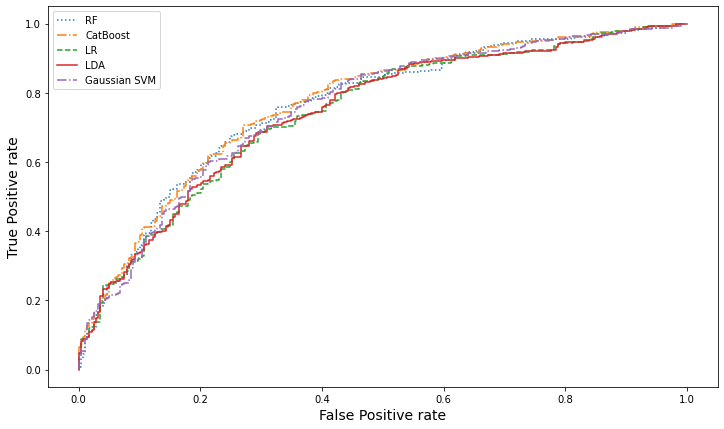

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from PIL import Image

probs_rf = tuned_rf.predict_proba(X_test)[:, 1]
probs_cat = tuned_cat.predict_proba(X_test)[:, 1]
probs_lr = tuned_lr.predict_proba(X_test)[:, 1]
probs_lda = tuned_lda.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_auc_score, roc_curve
y_test_int = y_test.replace({'Good': 1, 'Bad': 0})
auc_lr = roc_auc_score(y_test_int, probs_lr)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_int, probs_lr)

auc_rf = roc_auc_score(y_test_int, probs_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_int, probs_rf)

auc_cat = roc_auc_score(y_test_int, probs_cat)
fpr_cat, tpr_cat, thresholds_cat = roc_curve(y_test_int, probs_cat)

auc_lda = roc_auc_score(y_test_int, probs_lda)
fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_test_int, probs_lda)


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

tpr = []
fpr = []
roc_auc = []
y_score = tuned_gsvm.fit(X_train, Y_train).decision_function(X_test)
fpr,tpr,_ = roc_curve(Y_test, y_score)
auc_svc = auc(fpr,tpr)

fig = plt.figure(figsize=(12, 7))
plt.plot(fpr_rf, tpr_rf, linestyle=':',label=f'RF')
plt.plot(fpr_cat, tpr_cat, linestyle='-.',label=f'CatBoost')
plt.plot(fpr_lr, tpr_lr, linestyle='--', label=f'LR')
plt.plot(fpr_lda, tpr_lda, linestyle='-',label=f'LDA')
plt.plot(fpr, tpr,linestyle='dashdot', label=f'Gaussian SVM')

plt.xlabel('False Positive rate', size=14)
plt.ylabel('True Positive rate', size=14)
plt.legend();

fig.show()
fig.savefig('roccurve.png', dpi=600)
roccurve2 = Image.open('roccurve.png')
roccurve2.save('roccurve.tiff')

In [100]:
X_train.columns

Index(['문화예술', '스포츠', '관광', '취미오락', '휴식', '사회기타', '여가비용_B', '여가비용_C', '여가비용_D',
       '평일여가시간_B', '평일여가시간_C', '평일여가시간_D', '평일여가시간_E', '휴일여가시간_B', '휴일여가시간_C',
       '휴일여가시간_D', '휴일여가시간_E', '평일여가충분도', '휴일여가충분도', '공공여가시설충분도', '민간여가산업만족도',
       '일과여가의균형_B', '일과여가의균형_C', '여가인식삶의필수요건', '여가인식삶의영향력', '주평균근무시간_B',
       '주평균근무시간_C', '주평균근무시간_D', '성별 _W', '교육수준_B', '배우자유무_Y'],
      dtype='object')

In [133]:
X_train_Eng = ['Cultural and artistic activities', 'Sports', 'Tourism', 'Hobby and entertainment', 'Rest activities', 'Social activities', 'Leisure expense 6-12', 'Leisure expense 12-25', 'Leisure expense >25',
       'Weekdays leisure time 3-5', 'Weekdays leisure time 5-7', 'Weekdays leisure time 7-9', 'Weekdays leisure time >9', 'Holidays leisure time 3-5', 'Holidays leisure time 5-7',
       'Holidays leisure time 7-9', 'Holidays leisure time >9', 'Sufficiency of holidays leisure time', 'Sufficiency of weekdays leisure time', 'Public leisure facilities', 'Private leisure facilities',
       'BWLL Balanced', 'BWLL Focused on LL', 'Leisure perception: Essential', 'Leisure perception: Positive', 'Working hours per week 0-40',
       'Working hours per week 40-52', 'Working hours per week >52', 'Gender Female', 'Education College or above', 'Spouse Yes']

## 11. Feature Importance Plot / Coefficient Plot

In [61]:
"""
save_model(model=tuned_cat, 
           model_name='tuned_cat',
           verbose=False)

final_cat = finalize_model(estimator=tuned_cat)
save_model(model=final_cat, 
           model_name='final_cat',
           verbose=False)

save_model(model=tuned_rf, 
           model_name='tuned_rf',
           verbose=False)

final_rf = finalize_model(estimator=tuned_rf)
save_model(model=final_rf, 
           model_name='final_rf',
           verbose=False)

save_model(model=tuned_lr, 
           model_name='tuned_lr',
           verbose=False)

final_lr = finalize_model(estimator=tuned_lr)
save_model(model=final_lr, 
           model_name='final_lr',
           verbose=False)

save_model(model=tuned_lda, 
           model_name='tuned_lda',
           verbose=False)

save_model(model=tuned_gsvm, 
           model_name='tuned_gsvm',
           verbose=False)
"""

(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['문화예술', '스포츠', '관광',
                                                           '취미오락', '휴식', '사회기타',
                                                           '평일여가충분도', '휴일여가충분도',
                                                           '공공여가시설충분도',
                                                           '민간여가산업만족도',
                                                           '여가인식:삶의필수요건',
                                                           '여가인식:삶의영향력',
                                                           '여가비용_B', '여가비용_C',
                                                           '여가비용_D', '평일

#### 11.1 - Catboost (Feature Importance)

In [134]:
ft_importance_values = final_cat.feature_importances_

In [135]:
ft_importance_values

array([5.59687879, 6.11807314, 4.30779004, 3.64570322, 4.10890754,
       3.39096052, 1.20201058, 1.30275936, 1.85860741, 2.94545011,
       0.4600582 , 0.04614668, 0.01746191, 2.00963437, 0.8328658 ,
       0.9631009 , 0.4155502 , 6.36118732, 6.61870925, 6.09250564,
       6.27638368, 7.98238097, 7.52569232, 6.80231157, 3.62556746,
       1.53033616, 0.34991496, 0.15459792, 2.59039627, 2.53069119,
       2.33736654])

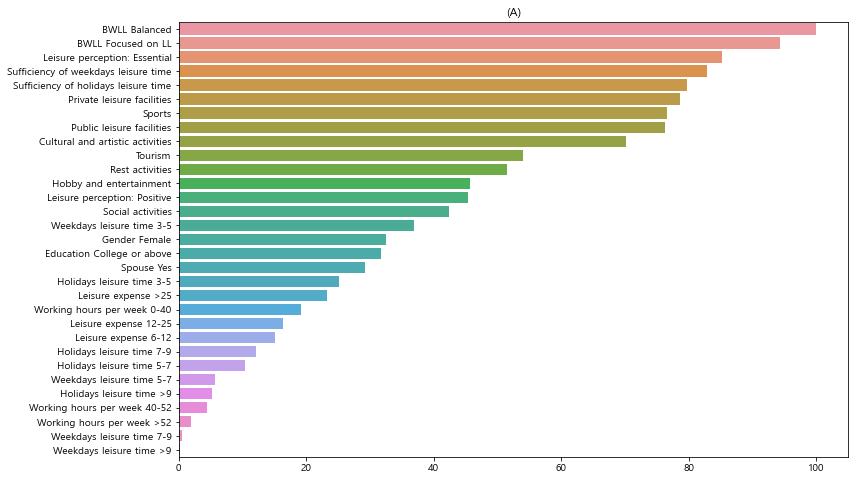

In [136]:
ft_importance_values = final_cat.feature_importances_
plt.rcParams['font.family'] = 'Malgun Gothic'
ft_series = pd.Series(ft_importance_values/7.98238097*100, index = X_train_Eng)
ft_top30 = ft_series.sort_values(ascending=False)[:60]

fig = plt.figure(figsize=(12,8))
sns.barplot(x=ft_top30, y=ft_top30.index)
plt.title('(A)')
plt.show()
plt.rcParams['font.family'] = 'Malgun Gothic'

In [137]:
#fig.show()
#fig.savefig('catboost_feature_importance.png', dpi=600, bbox_inches = "tight")
#roccurve2 = Image.open('catboost_feature_importance.png')
#roccurve2.save('catboost_feature_importance.tiff')

#### 11-2. Random Forest (Feature Importance)

In [138]:
ft_importance_values2 = final_rf.feature_importances_

In [139]:
ft_importance_values2

array([0.04989297, 0.05614531, 0.04631477, 0.04935006, 0.04328726,
       0.03496845, 0.01164282, 0.01221444, 0.01574395, 0.01344867,
       0.01156688, 0.00346078, 0.00200154, 0.01116984, 0.01137488,
       0.01315298, 0.01046869, 0.08804176, 0.08637742, 0.05848764,
       0.0609907 , 0.05831728, 0.07445962, 0.06097039, 0.0341324 ,
       0.01361391, 0.01065184, 0.01098863, 0.01337636, 0.01687153,
       0.01651623])

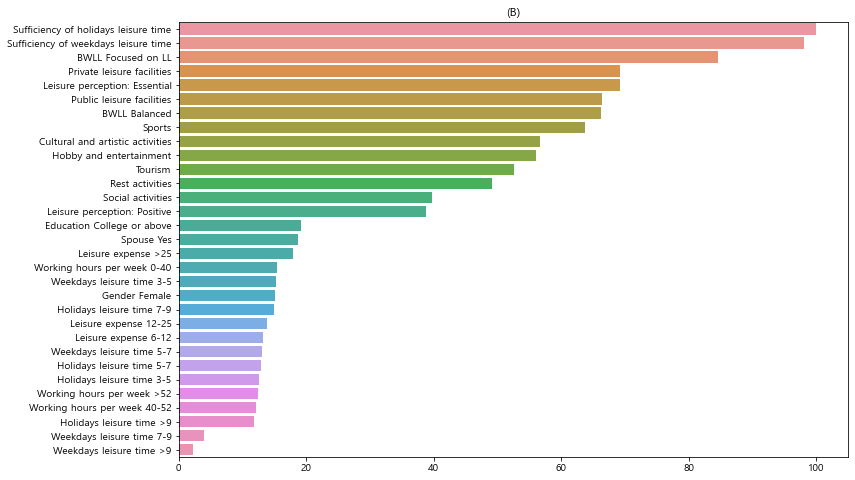

In [140]:
ft_importance_values2 = final_rf.feature_importances_
plt.rcParams['font.family'] = 'Malgun Gothic'
ft_series = pd.Series(ft_importance_values2/0.08804176*100, index = X_train_Eng)
ft_top30 = ft_series.sort_values(ascending=False)[:60]

fig = plt.figure(figsize=(12,8))
sns.barplot(x=ft_top30, y=ft_top30.index)
plt.title('(B)')
plt.show()
plt.rcParams['font.family'] = 'Malgun Gothic'

In [141]:
#fig.show()
#fig.savefig('rf_feature_importance.png', dpi=600, bbox_inches = "tight")
#roccurve2 = Image.open('rf_feature_importance.png')
#roccurve2.save('rf_feature_importance.tiff')

#### 11-3. Logistic Regression (t-value Plot)

In [201]:
X = get_config('X')
y = get_config('y')
params = np.append(final_lr.intercept_,final_lr.coef_)
predictions = final_lr.predict(X)

newX = np.append(np.ones((len(X),1)), X, axis=1)
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]
print(myDF3)

    Coefficients  Standard Errors  t values  Probabilities
0        -5.6136            0.095   -58.924          0.000
1         1.3934            0.120    11.595          0.000
2         1.6412            0.130    12.587          0.000
3         0.4480            0.061     7.321          0.000
4        -0.7055            0.104    -6.752          0.000
5        -0.4479            0.060    -7.522          0.000
6         0.5788            0.080     7.214          0.000
7         0.1852            0.027     6.748          0.000
8         0.3307            0.028    11.938          0.000
9         0.4027            0.029    13.825          0.000
10       -0.2502            0.027    -9.426          0.000
11        0.0306            0.044     0.689          0.491
12       -0.5875            0.076    -7.744          0.000
13       -0.7217            0.086    -8.432          0.000
14        0.2289            0.028     8.212          0.000
15        0.1784            0.035     5.089          0.0

In [221]:
kk= myDF3["t values"].drop(index=0).to_numpy()
kk

array([11.595, 12.587,  7.321, -6.752, -7.522,  7.214,  6.748, 11.938,
       13.825, -9.426,  0.689, -7.744, -8.432,  8.212,  5.089, 13.146,
        9.041, 18.816, 10.599,  7.708,  9.148, 53.341, 60.907, 20.072,
        0.923,  6.809, -0.495, -3.491, -0.179, 12.294, -8.971])

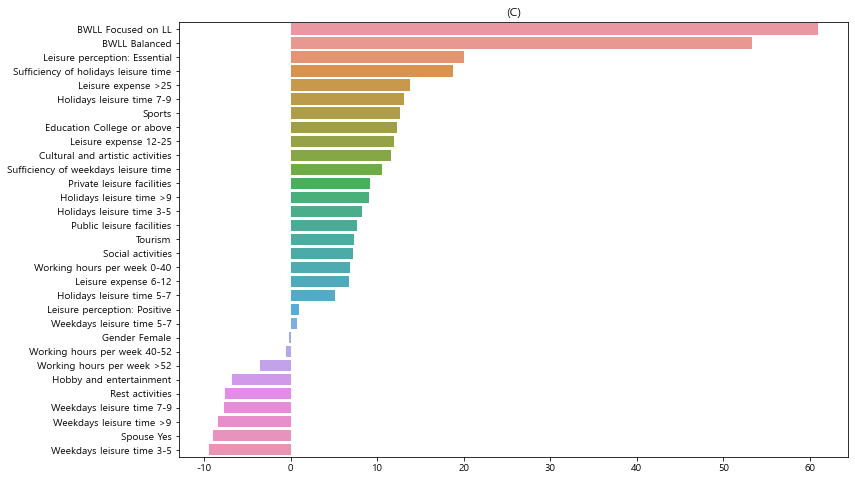

In [229]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
ft_series = pd.Series(kk[:], index = X_train_Eng)
ft_top30 = ft_series.sort_values(ascending=False)[:60]

fig = plt.figure(figsize=(12,8))
sns.barplot(x=ft_top30, y=ft_top30.index)
plt.title('(C)')
plt.show()
plt.rcParams['font.family'] = 'Malgun Gothic'

In [230]:
#fig.show()
#fig.savefig('lr_t-value_plot.png', dpi=600, bbox_inches = "tight")
#roccurve2 = Image.open('lr_t-value_plot.png')
#roccurve2.save('lr_t-value_plot.tiff')